# IMPORT LIBRARIES

In [13]:
!pip install Minio
!pip install delta-spark

In [14]:
from minio import Minio
from minio.error import S3Error
import pandas as pd
import matplotlib.pyplot as plt

# LOAD BUCKET

In [15]:
# Initialize MinIO client
client = Minio('localhost:9000',
                     access_key='minioadmin',
                     secret_key='minioadmin',
                     secure=False)  # Change to True if using HTTPS

bucket_name = "ecommerce"

# Example: List buckets
try:
    buckets = client.list_buckets()
    for bucket in buckets:
        print(bucket.name)
except S3Error as e:
    print("Error:", e)

try:
    objects = client.list_objects(bucket_name)
    for obj in objects:
        if obj.object_name.endswith('/'):
            print("Directory:", obj.object_name)
        else:
            print("File:", obj.object_name)
except S3Error as e:
    print("Error in listing objects:", e)

blah
climate-data
ecommerce
pythonminio
File: 2019-Dec.csv
File: 2019-Nov.csv
File: 2020-Apr.csv
File: 2020-Feb.csv
File: 2020-Mar.csv


In [42]:
# from pyspark.sql import SparkSession
# #import pyspark.errors
# from pyspark.sql.functions import col, max
# from delta import *

# # Stop the existing SparkContext if it exists
# try:
#     sc.stop()
# except NameError:
#     pass


# builder = SparkSession.builder.appName("Delta With MinIO") \
#     .config("spark.hadoop.fs.s3a.endpoint", "http://minio:9000") \
#     .config("spark.hadoop.fs.s3a.access.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.secret.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.path.style.access", True) \
#     .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
#     .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider") \
#     .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
#     .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

# spark = configure_spark_with_delta_pip(builder).getOrCreate()

# # Initialize Spark session
# """ spark = SparkSession.builder \
#     .appName("Temperature Analysis with Delta") \
#     .config("spark.hadoop.fs.s3a.endpoint", "http://minio:9000") \
#     .config("spark.hadoop.fs.s3a.access.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.secret.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.path.style.access", True) \
#     .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
#     .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider") \
#     .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
#     .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
#     .getOrCreate()
# """

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [17]:
# spark.sql("CREATE DATABASE IF NOT EXISTS ecommerce")

# READ DATA

In [18]:
# # einen test-DF erstellen, damit wir Delta ausprobieren können
# from pyspark.sql import Row

# # Create a list of numbers from 1 to 10
# numbers = list(range(1, 11))

# # Convert the list to a DataFrame
# df = spark.createDataFrame([Row(number=n) for n in numbers])

# # Show the DataFrame
# df.show()

In [19]:
# # Read CSV files from MinIO bucket
# df_feb = spark.read.csv(f"s3a://{bucket_name}/2020-Feb.csv", header=True, inferSchema=True)
# df = spark.read.csv(f"s3a://{bucket_name}/2020-Mar.csv", header=True, inferSchema=True)
# df_apr = spark.read.csv(f"s3a://{bucket_name}/2020-Apr.csv", header=True, inferSchema=True)

In [20]:
# # December 2019 data
# try:
#     response_dec = client.get_object(bucket_name, "2019-Dec.csv")
#     dec_data = pd.read_csv(response_dec)   # this data will be used in step 8
#     print(dec_data.head())  # Display first few rows
# except S3Error as e:
#     print("Error in reading object:", e)
# finally:
#     if 'response_dec' in locals():
#         response_dec.close()
#         response_dec.release_conn()

                event_time event_type  product_id          category_id  \
0  2019-12-01 00:00:00 UTC       view     1005105  2232732093077520756   
1  2019-12-01 00:00:00 UTC       view    22700068  2232732091643068746   
2  2019-12-01 00:00:01 UTC       view     2402273  2232732100769874463   
3  2019-12-01 00:00:02 UTC   purchase    26400248  2053013553056579841   
4  2019-12-01 00:00:02 UTC       view    20100164  2232732110089618156   

                   category_code  brand    price    user_id  \
0       construction.tools.light  apple  1302.48  556695836   
1                            NaN  force   102.96  577702456   
2   appliances.personal.massager  bosch   313.52  539453785   
3  computers.peripherals.printer    NaN   132.31  535135317   
4               apparel.trousers   nika   101.68  517987650   

                           user_session  
0  ca5eefc5-11f9-450c-91ed-380285a0bc80  
1  de33debe-c7bf-44e8-8a12-3bf8421f842a  
2  5ee185a7-0689-4a33-923d-ba0130929a76  
3  61792

In [21]:
# March 2020 data
try:
    response_mar = client.get_object(bucket_name, "2020-Mar.csv")
    data_mar = pd.read_csv(response_mar)   # this data will be used in step 8
    print(data_mar.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_mar' in locals():
        response_mar.close()
        response_mar.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-03-01 00:00:00 UTC       view    10900348  2232732105912091273   
1  2020-03-01 00:00:01 UTC       view    14300020  2232732107967300275   
2  2020-03-01 00:00:03 UTC       view    13200063  2232732061804790604   
3  2020-03-01 00:00:03 UTC       view   100077498  2232732085846540487   
4  2020-03-01 00:00:04 UTC       view     1005014  2232732093077520756   

                  category_code    brand   price    user_id  \
0      appliances.kitchen.mixer  kitfort  117.63  550295099   
1             apparel.underwear    casio  264.37  622070532   
2         furniture.bedroom.bed      NaN  126.10  552832344   
3  construction.tools.generator   tamina  424.72  613391860   
4      construction.tools.light  samsung  482.73  517021211   

                           user_session  
0  23f5ab9e-7774-416d-900b-f2725da671aa  
1  edf19213-f0dd-46e1-ae18-28968dbddd6e  
2  608087d8-6b69-21db-50a3-2b91ba015532  
3  5ab6c

In [22]:
# April 2020 data
try:
    response_apr = client.get_object(bucket_name, "2020-Apr.csv")
    data_apr = pd.read_csv(response_apr)   # this data will be used in step 8
    print(data_apr.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_apr' in locals():
        response_apr.close()
        response_apr.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-04-01 00:00:00 UTC       view     1201465  2232732101407408685   
1  2020-04-01 00:00:01 UTC       view     1307156  2053013554658804075   
2  2020-04-01 00:00:01 UTC       view     1480477  2053013563835941749   
3  2020-04-01 00:00:02 UTC       view     1307050  2053013554658804075   
4  2020-04-01 00:00:03 UTC       view     9500109  2232732104175649385   

                      category_code     brand    price    user_id  \
0             apparel.shoes.slipons   samsung   230.38  568984877   
1       electronics.audio.headphone     apple  1352.67  514955500   
2  appliances.kitchen.refrigerators     apple  1184.05  633645770   
3       electronics.audio.headphone     apple  1724.34  564933778   
4                     apparel.scarf  defender    25.05  530206135   

                           user_session  
0  e2456cef-2d4f-42b9-a53a-8893cb0c6851  
1  38f43134-de83-4710-ae0a-326677d292c6  
2  16aba270-b3

In [23]:
# February 2020 data
try:
    response_feb = client.get_object(bucket_name, "2020-Feb.csv")
    data_feb = pd.read_csv(response_feb)   # this data will be used in step 8
    print(data_feb.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_feb' in locals():
        response_feb.close()
        response_feb.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-02-01 00:00:00 UTC       view   100010426  2232732115290555244   
1  2020-02-01 00:00:00 UTC       view   100071077  2232732079706079299   
2  2020-02-01 00:00:00 UTC       view     1004665  2232732093077520756   
3  2020-02-01 00:00:01 UTC       view     1002544  2232732093077520756   
4  2020-02-01 00:00:01 UTC       view   100010151  2053013563835941749   

                      category_code    brand   price    user_id  \
0                     apparel.shoes      NaN   19.31  581521975   
1                     sport.bicycle    crown   11.88  596313635   
2          construction.tools.light  samsung  838.23  608821035   
3          construction.tools.light    apple  410.42  530488542   
4  appliances.kitchen.refrigerators   pulser  332.03  583795643   

                           user_session  
0  82d5664d-7980-43e1-ab27-a2f05e991760  
1  3df590c0-e667-4f5a-aa87-f47749cd6408  
2  3e271f43-db51-46bd-b215

In [24]:
print("Total number of rows in February 2020 data:", len(data_feb))
print("Total number of rows in March 2020 data:", len(data_mar))
print("Total number of rows in April 2020 data:", len(data_apr))

Total number of rows in February 2020 data: 55318565
Total number of rows in March 2020 data: 56341241
Total number of rows in April 2020 data: 66589268


# EXPLORE THE DATA

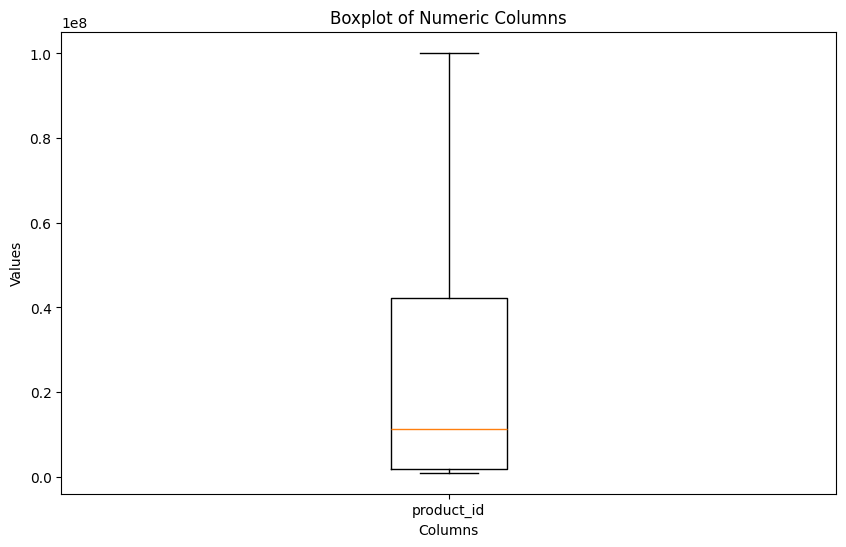

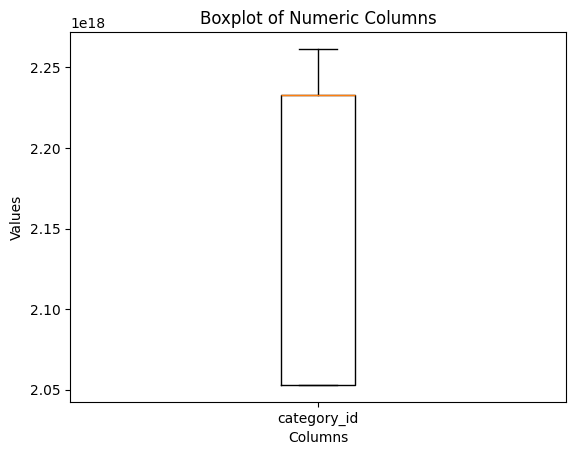

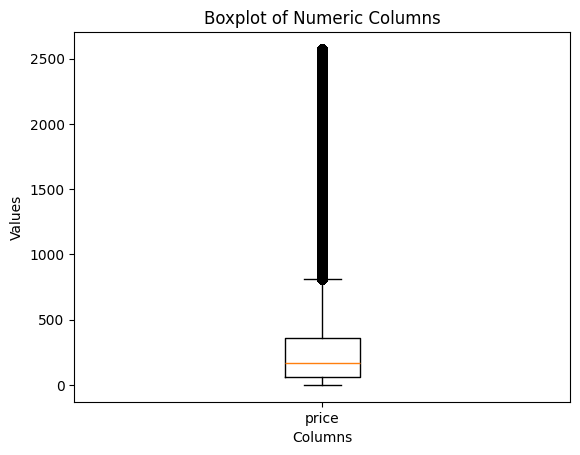

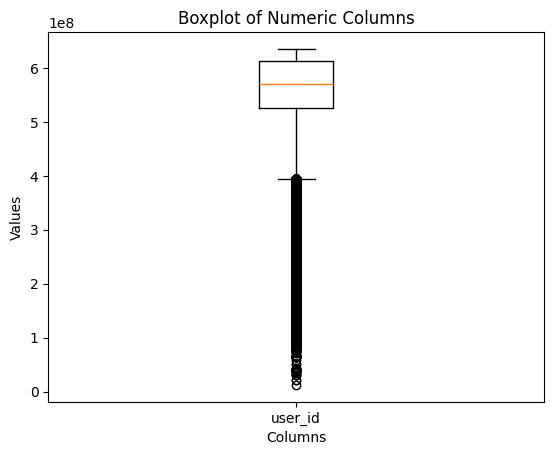

In [25]:
df = pd.DataFrame(data_mar)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()



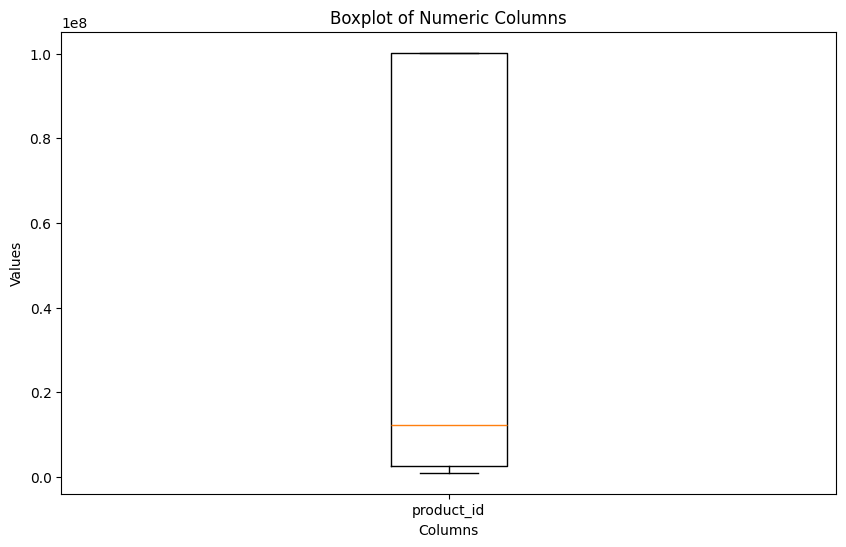

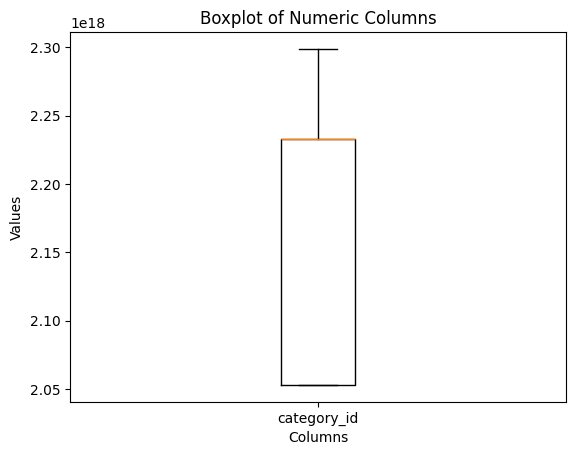

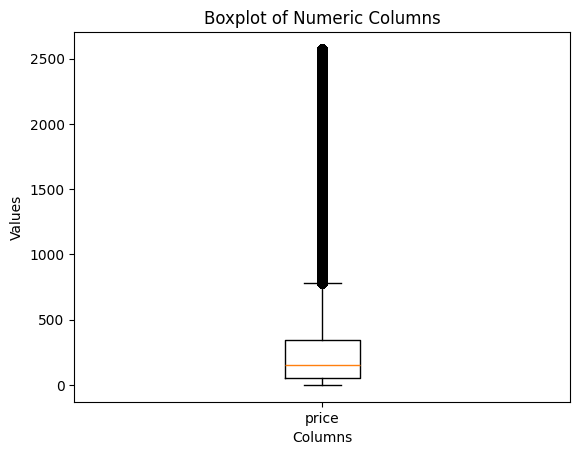

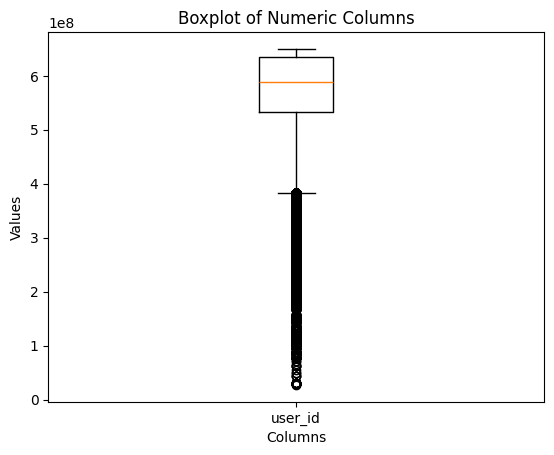

In [26]:
df = pd.DataFrame(data_apr)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()

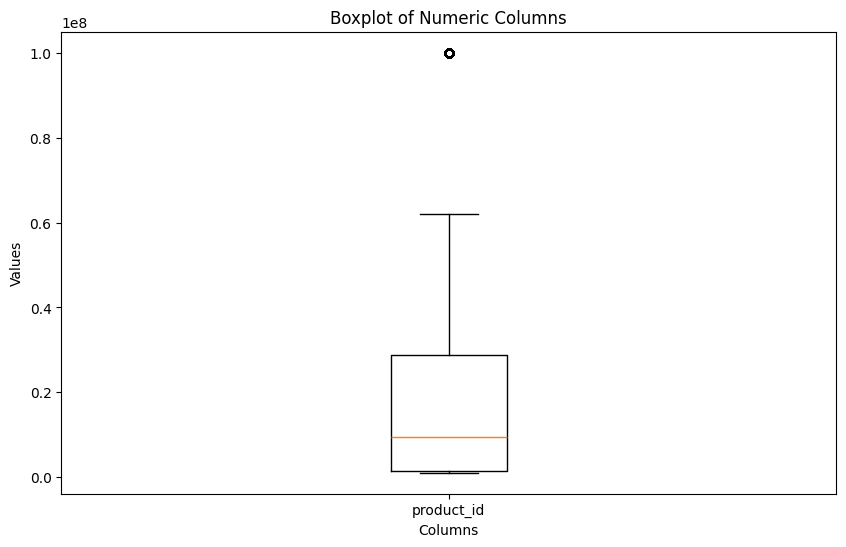

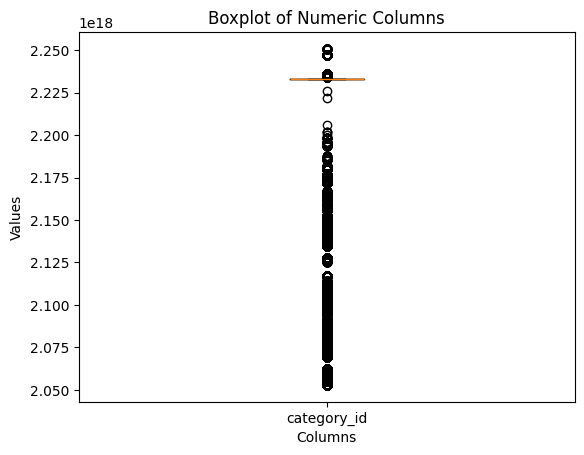

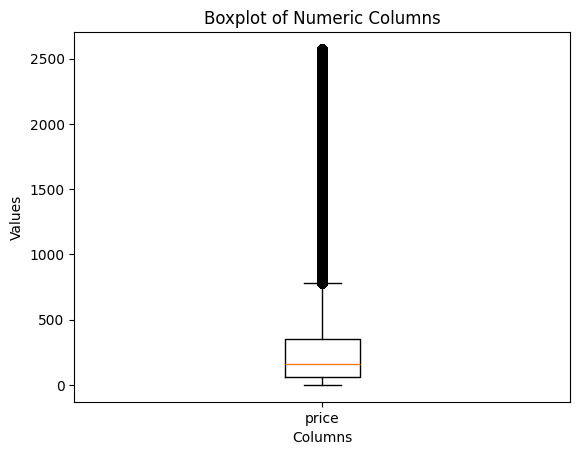

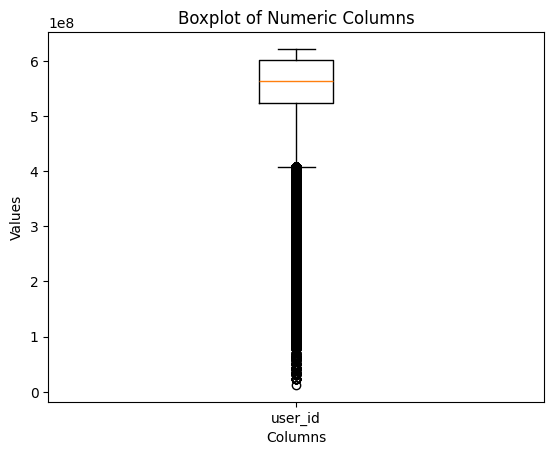

In [27]:
df = pd.DataFrame(data_feb)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()


# there is an outlier in the product_id column

In [28]:
print(data_feb.info())
print(data_mar.info())
print(data_apr.info())

print(data_feb.isnull().sum())
print(data_mar.isnull().sum())
print(data_apr.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318565 entries, 0 to 55318564
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56341241 entries, 0 to 56341240
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.8+ GB
None
<class 'pandas.core.fr

In [29]:
print(f"Feb Data has {data_feb["category_code"].value_counts().sum()} rows, in which {data_feb["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_feb["category_code"].value_counts().sum() - data_feb["category_code"].isnull().sum()} rows or {((data_feb["category_code"].value_counts().sum() - data_feb["category_code"].isnull().sum())/data_feb["category_code"].value_counts().sum())*100}% of the data")
print(f"Mar Data has {data_mar["category_code"].value_counts().sum()} rows, in which {data_mar["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_mar["category_code"].value_counts().sum() - data_mar["category_code"].isnull().sum()} rows or {((data_mar["category_code"].value_counts().sum() - data_mar["category_code"].isnull().sum())/data_mar["category_code"].value_counts().sum())*100}% of the data")
print(f"Apr Data has {data_apr["category_code"].value_counts().sum()} rows, in which {data_apr["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_apr["category_code"].value_counts().sum() - data_apr["category_code"].isnull().sum()} rows or {((data_apr["category_code"].value_counts().sum() - data_apr["category_code"].isnull().sum())/data_apr["category_code"].value_counts().sum())*100}% of the data")

Feb Data has 50388885 rows, in which 4929680 of the data is null. Which means the non null data is 45459205 rows or 90.21673132874443% of the data
Mar Data has 50402549 rows, in which 5938692 of the data is null. Which means the non null data is 44463857 rows or 88.21747685816446% of the data
Apr Data has 59833395 rows, in which 6755873 of the data is null. Which means the non null data is 53077522 rows or 88.70885899086957% of the data


In [30]:
data_feb["event_time"] = pd.to_datetime(data_feb["event_time"])
data_mar["event_time"] = pd.to_datetime(data_mar["event_time"])
data_apr["event_time"] = pd.to_datetime(data_apr["event_time"])

data_feb["event_type"] = data_feb["event_type"].astype('category')	
data_mar["event_type"] = data_mar["event_type"].astype('category')
data_apr["event_type"] = data_apr["event_type"].astype('category')

data_feb["category_code"] = data_feb["category_code"].astype('category')
data_mar["category_code"] = data_mar["category_code"].astype('category')
data_apr["category_code"] = data_apr["category_code"].astype('category')



print(data_feb.info())
print(data_mar.info())
print(data_apr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318565 entries, 0 to 55318564
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  category           
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(3), object(2)
memory usage: 3.0+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56341241 entries, 0 to 56341240
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int64              
 3   category_id    int64   

In [31]:
print(data_feb.describe())
print(data_mar.describe())
print(data_apr.describe())

# Ratio of event types
print(data_feb["event_type"].value_counts(normalize=True))	
print(data_mar["event_type"].value_counts(normalize=True))
print(data_apr["event_type"].value_counts(normalize=True))

# Ratio of category codes
print(data_feb["category_code"].value_counts(normalize=True))
print(data_mar["category_code"].value_counts(normalize=True))
print(data_apr["category_code"].value_counts(normalize=True))

         product_id   category_id         price       user_id
count  5.531856e+07  5.531856e+07  5.531856e+07  5.531856e+07
mean   2.738181e+07  2.188589e+18  2.877152e+02  5.633426e+08
std    3.685243e+07  7.731789e+16  3.582074e+02  3.828326e+07
min    1.000365e+06  2.053014e+18  0.000000e+00  1.251152e+07
25%    1.307546e+06  2.232732e+18  6.178000e+01  5.235147e+08
50%    9.300067e+06  2.232732e+18  1.639800e+02  5.637833e+08
75%    2.871434e+07  2.232732e+18  3.500500e+02  6.009724e+08
max    1.001448e+08  2.250811e+18  2.574070e+03  6.220907e+08
         product_id   category_id         price       user_id
count  5.634124e+07  5.634124e+07  5.634124e+07  5.634124e+07
mean   3.087900e+07  2.182506e+18  2.927261e+02  5.699139e+08
std    3.948077e+07  8.053784e+16  3.630798e+02  4.269567e+07
min    1.000978e+06  2.053014e+18  0.000000e+00  1.251152e+07
25%    1.801966e+06  2.053014e+18  6.229000e+01  5.252587e+08
50%    1.140027e+07  2.232732e+18  1.681300e+02  5.695703e+08
75%    4

In [32]:
(data_feb["event_type"] == "purchase").sum()


1200288

In [33]:
print(data_feb.groupby("event_type").describe())

C:\Users\vae.tiolamon\AppData\Local\Temp\ipykernel_65092\1432064459.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_feb.groupby("event_type").describe())


            product_id                                                    \
                 count          mean           std        min        25%   
event_type                                                                 
cart         2885608.0  1.761852e+07  3.092900e+07  1000978.0  1005115.0   
purchase     1200288.0  1.796980e+07  3.245663e+07  1001588.0  1005101.0   
view        51232669.0  2.815221e+07  3.714587e+07  1000365.0  1701462.0   

                                                category_id                \
                   50%         75%          max       count          mean   
event_type                                                                  
cart         4100346.0  15901419.0  100144608.0   2885608.0  2.201706e+18   
purchase     2601780.0  15200181.0  100144443.0   1200288.0  2.206952e+18   
view        10504485.0  28722139.0  100144758.0  51232669.0  2.187420e+18   

            ...   price              user_id                              \
    

In [55]:
df_feb = pd.DataFrame(data_feb)
df_mar = pd.DataFrame(data_mar)
df_apr = pd.DataFrame(data_apr)

print(df_feb.head())
print(df_mar.head())
print(df_apr.head())

                 event_time event_type  product_id          category_id  \
0 2020-02-01 00:00:00+00:00       view   100010426  2232732115290555244   
1 2020-02-01 00:00:00+00:00       view   100071077  2232732079706079299   
2 2020-02-01 00:00:00+00:00       view     1004665  2232732093077520756   
3 2020-02-01 00:00:01+00:00       view     1002544  2232732093077520756   
4 2020-02-01 00:00:01+00:00       view   100010151  2053013563835941749   

                      category_code    brand   price    user_id  \
0                     apparel.shoes      NaN   19.31  581521975   
1                     sport.bicycle    crown   11.88  596313635   
2          construction.tools.light  samsung  838.23  608821035   
3          construction.tools.light    apple  410.42  530488542   
4  appliances.kitchen.refrigerators   pulser  332.03  583795643   

                           user_session  
0  82d5664d-7980-43e1-ab27-a2f05e991760  
1  3df590c0-e667-4f5a-aa87-f47749cd6408  
2  3e271f43-db51-46b

In [56]:
# df_feb = df_feb[df_feb['event_type'] != 'view']
# df_mar = df_mar[df_mar['event_type'] != 'view']
# df_apr = df_apr[df_apr['event_type'] != 'view']

# print(df_feb)
# print(df_mar)
# print(df_apr)

We are droping the user_id and product_id because we don't need this column in our project and it may take up some storage space. In the next chunk, you can see that the user_id and product_id columns take up how much storage.

## !don't forget to make the calculation

In [57]:
df_feb.drop(["user_id", "product_id"], axis=1, inplace=True)
df_mar.drop(["user_id", "product_id"], axis=1, inplace=True)
df_apr.drop(["user_id", "product_id"], axis=1, inplace=True)

In this case, since we don't have the product name, only the product id, what we do is drop the NaN. But in real world, we wouldn't delete in, and instead we bind it with the product name in another database and make a machine learning classification to determine which categories the product goes.

The reason why we drop user_session NaN is because there aren't a lot of NaN there, and since we need the column, we cannot drop the whole column nor replace it with a random id because we are not sure if the missing values may be the same person.

In [58]:
df_feb.dropna(subset=['category_code'], inplace=True)
df_mar.dropna(subset=['category_code'], inplace=True)
df_apr.dropna(subset=['category_code'], inplace=True)

df_feb.dropna(subset=['user_session'], inplace=True)
df_mar.dropna(subset=['user_session'], inplace=True)
df_apr.dropna(subset=['user_session'], inplace=True)

print(df_feb.isnull().sum())
print(df_mar.isnull().sum())
print(df_apr.isnull().sum())

event_time             0
event_type             0
product_id             0
category_id            0
category_code          0
brand            7451458
price                  0
user_session           0
dtype: int64
event_time             0
event_type             0
product_id             0
category_id            0
category_code          0
brand            6953261
price                  0
user_session           0
dtype: int64
event_time             0
event_type             0
product_id             0
category_id            0
category_code          0
brand            7614761
price                  0
user_session           0
dtype: int64


In [59]:
df_feb.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session
55318560,2020-02-29 23:59:57+00:00,view,100118024,2232732099436085763,construction.tools.welding,a-case,1.93,57732f68-9928-47ff-bf88-09a7767fe86c
55318561,2020-02-29 23:59:58+00:00,view,12200332,2053013553325015316,appliances.kitchen.toster,phoenix,77.20,f7c7cdc5-5952-4337-8f3d-1afdb5457c9f
55318562,2020-02-29 23:59:58+00:00,view,6902464,2232732078733000751,electronics.telephone,zlatek,49.91,48714293-b3f9-4946-8135-eb1ea05ead74
55318563,2020-02-29 23:59:59+00:00,view,100103966,2053013560530830019,electronics.camera.video,bq,10.77,71920ba0-0e94-4f73-b7ae-e5e411d6765f
55318564,2020-02-29 23:59:59+00:00,view,16000659,2053013556856619499,accessories.bag,gipfel,129.19,d2241bd8-e2a5-4bdf-9591-57483a2da8ee


In [60]:
# Concatenate the DataFrames vertically
combined_df = pd.concat([df_feb, df_mar, df_apr], ignore_index=True)

# Display the combined DataFrame
print(combined_df)



                         event_time event_type  product_id  \
0         2020-02-01 00:00:00+00:00       view   100010426   
1         2020-02-01 00:00:00+00:00       view   100071077   
2         2020-02-01 00:00:00+00:00       view     1004665   
3         2020-02-01 00:00:01+00:00       view     1002544   
4         2020-02-01 00:00:01+00:00       view   100010151   
...                             ...        ...         ...   
160624670 2020-04-30 23:59:59+00:00       view     1003319   
160624671 2020-04-30 23:59:59+00:00       view     1005141   
160624672 2020-04-30 23:59:59+00:00       view   100205454   
160624673 2020-04-30 23:59:59+00:00       view    12200824   
160624674 2020-04-30 23:59:59+00:00       view     1004342   

                   category_id                     category_code    brand  \
0          2232732115290555244                     apparel.shoes      NaN   
1          2232732079706079299                     sport.bicycle    crown   
2          2232732093077

In [61]:
combined_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session
0,2020-02-01 00:00:00+00:00,view,100010426,2232732115290555244,apparel.shoes,NaN,19.31,82d5664d-7980-43e1-ab27-a2f05e991760
1,2020-02-01 00:00:00+00:00,view,100071077,2232732079706079299,sport.bicycle,crown,11.88,3df590c0-e667-4f5a-aa87-f47749cd6408
2,2020-02-01 00:00:00+00:00,view,1004665,2232732093077520756,construction.tools.light,samsung,838.23,3e271f43-db51-46bd-b215-c2907ed1a204
3,2020-02-01 00:00:01+00:00,view,1002544,2232732093077520756,construction.tools.light,apple,410.42,21f46782-fb36-4d5c-82d4-6dc26ae93fad
4,2020-02-01 00:00:01+00:00,view,100010151,2053013563835941749,appliances.kitchen.refrigerators,pulser,332.03,eddfe0e2-12f8-4357-b453-00786c9b0319


In [62]:
len(combined_df)

160624675

In [63]:

combined_df_noview = combined_df[combined_df['event_type'] != 'view']
len(combined_df_noview)


11248195

In [64]:
print(f"{(len(combined_df_noview)/len(combined_df))*100}%")

print(f"1 unit is approximately equal to {unit_ratio} products")

7.002781484227127%


NameError: name 'unit_ratio' is not defined

# UPLOAD CLEANED DATA TO ANOTHER BUCKET TO BE USED FOR THE NEXT STEP

In [ ]:
# from pyspark.sql import SparkSession

# # Assuming your cleaned data is stored in a dictionary
# cleaned_data = {
#     "col1": [1, 2, 3],
#     "col2": ["A", "B", "C"]
# }

# # Create a SparkSession
# spark = SparkSession.builder.appName("Example").getOrCreate()

# # Convert dictionary to DataFrame
# cleaned_data_df = spark.createDataFrame([(k, v) for k, v in cleaned_data.items()], ["col_name", "col_data"])

# # Save DataFrame to MinIO bucket as CSV
# minio_endpoint = "http://localhost:9001/browser/ecommerce"  # Replace with your MinIO endpoint

# cleaned_data_df.write.format("csv") \
#     .option("header", "true") \
#     .mode("overwrite") \
#     .save(f"s3a://{minio_endpoint}/{bucket_name}/cleaned_data.csv")
